In [2]:
from __future__ import division
import numpy as np
import pandas as pd
from add_feature import PreProcessing
from dataloader_1 import DataLoader
from set_year import SetYear
import matplotlib.pyplot as plt

In [402]:
d = np.load('C:\\Users\\Administrator\\PycharmProjects\\yonyou\\data\\data3.npy',allow_pickle=True)


In [425]:
sum([i[1] for i in d if i[0][0] == 174152])/400

2073.345

In [413]:
d

array([[(124404, 2923958, '20170501'), 2],
       [(124404, 2925595, '20170501'), 1],
       [(124404, 2925645, '20170501'), 5],
       ...,
       [(158769, '3246987', '20180831'), 2],
       [(166408, '3316005', '20180831'), 1],
       [(117410, '57dec410-e0e6-4ba6-a325-f4d104a7e642', '20180831'), 7]],
      dtype=object)

In [351]:
df = []
for i in d:
    temp = list(i[0])
    temp.append(i[1])
    df.append(temp)

In [352]:
data = pd.DataFrame(df,columns = ['instance_id','user_id','date','actions'])

In [354]:
process = PreProcessing(data,'date')

In [355]:
data_with_date_type = process.add_column()

step 1: iteration 2277999  out of 2278543


In [358]:
data_with_date_type.head(1)

,instance_id,user_id,date,actions,date_type
0,124404,2923958,20170501,2,1


In [407]:
data_with_date_type[(data_with_date_type['instance_id']==161119) & (data_with_date_type['user_id'] != '0')]

,instance_id,user_id,date,actions,date_type
36835,161119,0,20170707,21,0
339213,161119,0,20171101,1,0


In [356]:
np.save('data.npy',data_with_date_type)

In [25]:
data_with_date_type = np.load('data.npy', allow_pickle=True)

In [24]:
s = SetYear(df = data_with_date_type,filename='C:\\Users\\Administrator\\PycharmProjects\\yonyou\\data\\instance_created.csv')

In [27]:
data_array = s.change_time()

start step 2


In [343]:
data_array = pd.DataFrame(data_array,columns=['instanceId','userId','date','actions'])


In [30]:
data_array['date'] = pd.to_numeric(data_array['date'])

In [335]:
data_array = data_array[(data_array['date'] >= 0) & (data_array['userId'] == 0)]

In [348]:
sum(data_array[(data_array['instanceId']==3618) & (data_array['userId'] != 0)]['actions'].tolist())

0

In [337]:
# Get unique instances
unique_instances = list(set(data_array['instanceId'].tolist()))
def build(i):
    #select * from df where instanceId == i
    df = data_array[(data_array['instanceId'] == i)]
    
    d = df['date'].tolist()
    unique_dates = sorted(list(set(d)))
    
    # Make a dictionary containing {True_Date: index_of_date}
    dictionary = {}
    for index, item in enumerate(unique_dates):
        dictionary.update({item: index})
    column = []
    
    for i in d:
        for key in dictionary:
            if i == key:
                column.append(dictionary[key])
                
    df['date'] = column
    return df
result = list(map(build, unique_instances))

for i in range(len(result)):
    if i == 0:
        data = result[i]
    else:
        data = pd.concat([data,result[i]], axis = 0)
    

In [338]:
data = data[data['date'] <= 125]

TypeError: tuple indices must be integers or slices, not str

In [339]:
sum(data['actions'].tolist())

TypeError: tuple indices must be integers or slices, not str

In [325]:
p = DataLoader(data,'date',['userId','actions','instanceId','date'],'instanceId'
              )

In [326]:
data = p.sum_all()

step 2: iteration 125  out of 126
time ultilized: 0.42386746406555176


In [327]:
data1 = np.array(data[0])
data1 = np.transpose(np.array(data1),(1,0))

In [328]:
data1.shape

(189, 126)

In [329]:
repaid = pd.read_csv('C:\\Users\\Administrator\\PycharmProjects\\yonyou\\data\\repaid_instances.csv')
repaid_list = repaid['instance_id'].tolist()
instances = [int(i) for i in data[1]]
label = []
for i in instances:
    if i in repaid_list:
        label.append(1)
    else:
        label.append(0)

In [388]:
[sum(i) for i in data1]

[108339,
 3618,
 22846,
 3662,
 3635,
 8227,
 1,
 764,
 64675,
 8295,
 72503,
 32,
 4227,
 20951,
 665,
 140208,
 12954,
 18,
 123,
 24944,
 910,
 1801291,
 3621,
 981,
 2221,
 6623,
 41786,
 13020,
 450161,
 472,
 74,
 105,
 44599,
 1000,
 18339,
 144,
 2150,
 28226,
 246,
 7862,
 202456,
 31191,
 15584,
 22,
 7316,
 2,
 14,
 207798,
 348,
 2029,
 14303,
 2672,
 7279,
 730,
 12638,
 43155,
 220,
 356,
 2219,
 117,
 54714,
 32242,
 3178,
 7075,
 221488,
 6167,
 33791,
 11836,
 37095,
 6142,
 429,
 109084,
 52,
 22223,
 623,
 112,
 66379,
 121064,
 5930,
 288,
 11769,
 32,
 4340,
 26563,
 1549,
 2882,
 3731,
 17794,
 4393,
 79013,
 7752,
 13232,
 604,
 494,
 690,
 7,
 1837,
 14203,
 44517,
 48216,
 9722,
 1733,
 843,
 925,
 128005,
 45266,
 2854,
 1825,
 6874,
 36600,
 11610,
 289266,
 23197,
 556,
 11224,
 6877,
 23353,
 4652,
 83857,
 170212,
 568,
 75377,
 125355,
 227,
 1256,
 118868,
 21421,
 605,
 23556,
 293,
 935,
 135,
 95744,
 236,
 6,
 5537,
 77881,
 96,
 52719,
 35,
 15879,


In [331]:
def plot(x,y):
    p1 = np.polyfit(x, y, 1)
    plt.scatter(x, y)
    xlims = plt.xlim()
    x.insert(0, xlims[0])
    plt.xlabel("work_days")

    plt.ylabel("number of actions")
    y.insert(0, np.polyval(p1, xlims[0]))
    x.append(xlims[1])
    y.append(np.polyval(p1, xlims[1]))
    plt.plot(x, np.polyval(p1,x), 'r-', linewidth = 1.5)
    plt.xlim(xlims)
    plt.show()

In [420]:
instances.index(174152)

28

22.793310836145462 [21.793310836145462]
0 174152 450161


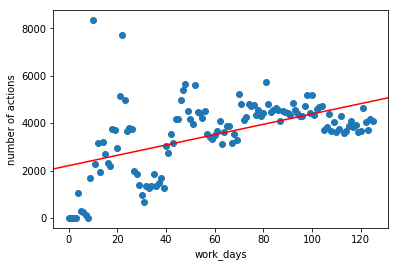

In [421]:
indx = 28
y = list(data1[indx])
x = list(np.arange(len(y)))
iteration = 1
step = len(y)//iteration
coeffs = []
for i in range(iteration):
    coeffs.append(np.polyfit(x[i*step: (i+1) * step],y[i*step: (i+1) * step],1)[0])
coef = 0
for index, i in enumerate(coeffs):
    coef += 1+ ((index+1)/(iteration))* i
print(coef,coeffs)

print(label[indx],instances[indx],sum(y))
plot(x,y)

In [ ]:
t = time.time()
def build(i):
    for j in b:
        if i>j:
            return i
lst1 = list(map(build,a))
print(time.time()-t)


In [ ]:
lst1